In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
import pandas as pd

# File path to the Titanic dataset
file_path = r"C:\Users\Admin\Downloads\Titanic-Dataset.csv"

# Read the dataset into a DataFrame
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [57]:
# Group data by passenger class and calculate survival rate
grouped_data = titanic_data.groupby('Pclass')['Survived'].mean() * 100

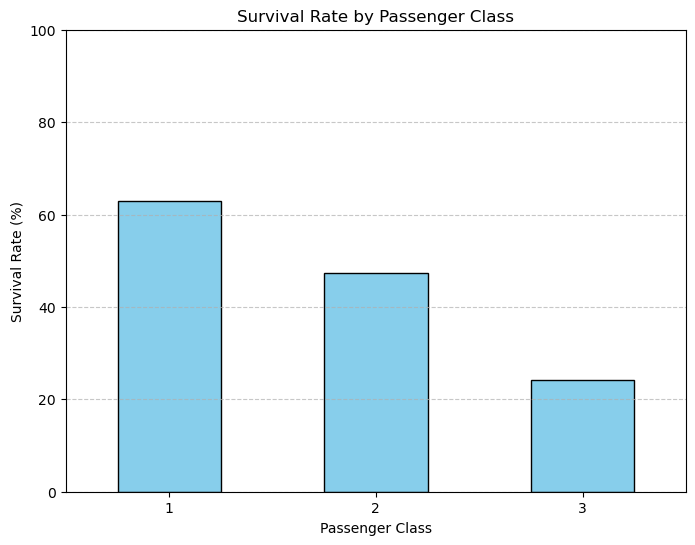

In [58]:
# Plot the survival rate by passenger class
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [59]:
# Calculate the sex ratio
sex_ratio = titanic_data['Sex'].value_counts()

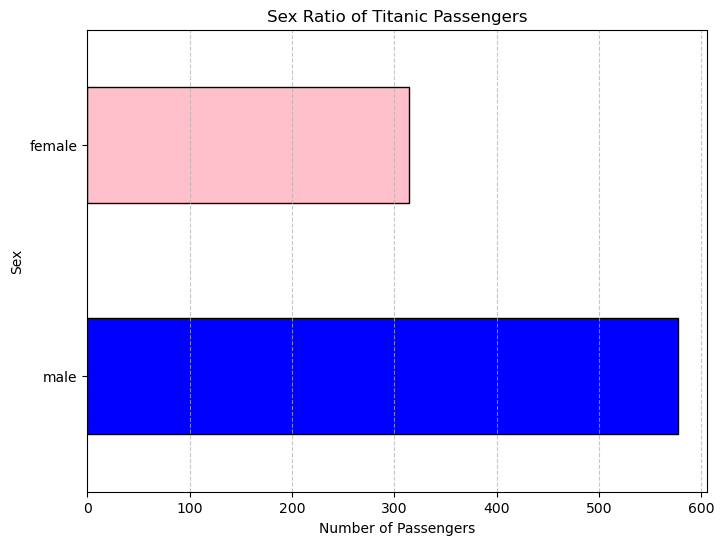

In [60]:
# Plot the sex ratio with a horizontal bar graph
plt.figure(figsize=(8, 6))
sex_ratio.plot(kind='barh', color=['blue', 'pink'], edgecolor='black')
plt.title('Sex Ratio of Titanic Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Sex')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [64]:
# Calculate the survival count
survival_count = titanic_data['Survived'].value_counts()

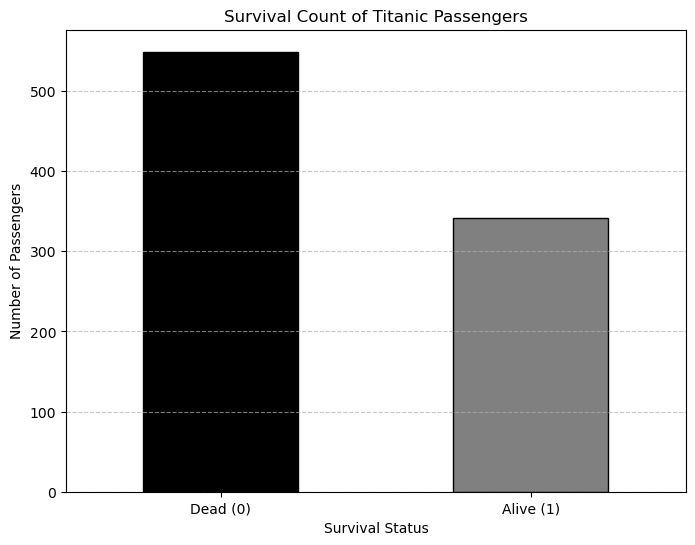

In [67]:
# Plot the survival count
plt.figure(figsize=(8, 6))
survival_count.plot(kind='bar', color=['black', 'grey'], edgecolor='black')
plt.title('Survival Count of Titanic Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Dead (0)', 'Alive (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [81]:
# Drop columns that are not useful for prediction, if they exist
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data.drop([col for col in columns_to_drop if col in titanic_data.columns], axis=1, inplace=True)

In [83]:
titanic_data.head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [109]:
# Handle missing values for 'Age' if it exists
if 'Age' in titanic_data.columns:
    titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
    print("Dataset after handling missing 'Age' values:\n", titanic_data.head())

# Handle missing values for 'Embarked' if it exists
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
    print("Dataset after handling missing 'Embarked' values:\n", titanic_data.head())

In [111]:
# Encode categorical variables if they exist
label_encoder = LabelEncoder()
if 'Sex' in titanic_data.columns:
    titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
    print("Dataset after encoding 'Sex':\n", titanic_data.head())
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])
    print("Dataset after encoding 'Embarked':\n", titanic_data.head())

In [113]:
# Separate features and target variable
if 'Survived' in titanic_data.columns:
    X = titanic_data.drop('Survived', axis=1)
    y = titanic_data['Survived']
else:
    raise KeyError("'Survived' column is missing in the dataset")

# Print the dataset after separating features and target variable
print("Features (X) after separation:\n", X.head())
print("Target (y) after separation:\n", y.head())

Features (X) after separation:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Target (y) after separation:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [143]:
# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [145]:
# Make predictions
y_pred = logreg.predict(X_test)

In [147]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [151]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

